In [1]:
import backtrader as bt
import btalib
import backtrader.indicators as btind
import backtrader.feeds as btfeeds
import pandas as pd 
import os, sys
from datetime import datetime, timedelta
import matplotlib.pylab as plt 
# %matplotlib inline

import requests
from pprint import pprint 
import configparser
from urllib.parse import urljoin 
from pprint import pprint 
from datetime import datetime
# from cryptoquant import coinbase_premium_df, price_df, coinbase_premium_df_new, str_to_datetime
# from strategy import PrintData, CoinbaseData, PriceData, PriceSignalData, RSI, Test, SMACross, MACrossOver
#from utils import time_conversion, merge_price_signal, line_graph, multiline_graph, line_graph_img, multiline_graph_img, print_trade_analysis, print_sqn, outliers_removed, group_mean
from cryptoquant import *
from strategy import *
from utils import * 


from IPython.display import Image
import openpyxl

date_format = '%Y-%m-%d %H:%M:%S'

coinbase_datetime_format = '%Y-%m-%dT%H:%M:%S'
CQ_DATE_FORMAT = '%Y%m%dT%H%M%S'

In [2]:
limit = 10000
coinbase = coinbase_premium_df(limit=limit)
new_date = time_conversion(coinbase.index[-1])
price = price_df(to=new_date, limit=limit)

price.index = pd.to_datetime(price.index)
coinbase.index = pd.to_datetime(coinbase.index)

data = merge_price_signal(price, coinbase)

In [3]:
new_date

'20210430T072000'

In [4]:
datetime_obj = str_to_datetime(new_date, CQ_DATE_FORMAT)
datetime_obj

datetime.datetime(2021, 4, 30, 7, 20)

In [5]:
start = '20200127T010200'
end =   '20200430T010200'


data = price_big_df(start, end)
data

,price_usd_open,price_usd_high,price_usd_low,price_usd_close
datetime,,,,
2020-01-27 01:02:00,8658.1375,8661.3750,8656.385000,8657.642500
2020-01-27 01:03:00,8655.2575,8656.7275,8652.925000,8654.062500
2020-01-27 01:04:00,8654.3525,8656.7625,8652.815000,8654.190000
2020-01-27 01:05:00,8655.8050,8659.4150,8655.655000,8659.415000
2020-01-27 01:06:00,8661.0475,8663.9500,8656.252782,8661.130282
...,...,...,...,...
2020-04-30 00:58:00,8789.1450,8819.7800,8768.100000,8790.195000
2020-04-30 00:59:00,8790.4350,8816.3000,8768.100000,8791.795000
2020-04-30 01:00:00,8791.7200,8817.0200,8768.100000,8790.070000


In [7]:
data[99999:100003]

,coinbase_premium_gap,coinbase_premium_index
datetime,,
2020-04-05 18:42:00,10.18,0.149456
2020-04-05 18:43:00,12.26,0.180109
2020-04-05 18:44:00,9.87,0.144947
2020-04-05 18:45:00,5.03,0.073905


In [6]:
start = '20200127T010200'
end =   '20200430T010200'


data = coinbase_premium_big_df(start, end)
data

,coinbase_premium_gap,coinbase_premium_index
datetime,,
2020-01-27 01:02:00,-31.47,-0.362839
2020-01-27 01:03:00,-23.21,-0.267885
2020-01-27 01:04:00,-16.66,-0.192309
2020-01-27 01:05:00,-27.96,-0.322196
2020-01-27 01:06:00,-21.42,-0.246973
...,...,...
2020-04-30 00:58:00,7.73,0.087718
2020-04-30 00:59:00,4.54,0.051500
2020-04-30 01:00:00,6.15,0.069791


In [16]:
start = '20200127T010200'
end =   '20200430T010200'

data = []

PATH = 'btc/market-data/coinbase-premium-index'
URL = urljoin(API_URL, PATH)

start_time = str_to_datetime(start, CQ_DATE_FORMAT)
end_time = str_to_datetime(end, CQ_DATE_FORMAT)
num_mins = (end_time - start_time).days *24 * 60
print(f'num_minutes : {num_mins}')

while start_time < end_time:
    print(f'start - end: {start_time} - {end_time}')
    print(f'start - end: {start} - {end}')

    params = {
        'window': 'min',
        'from': start,
        'to': end, 
        'limit': 100000,
    }

    response = requests.get(URL, headers=headers, params=params).json()
    coinbase_premium_index = response['result']['data']
        
    data += coinbase_premium_index
    #end = coinbase_premium_index[0]['datetime']
    #start = coinbase_premium_index[-1]['datetime']
    #start_time = str_to_datetime(start, date_format)
    #end_time = str_to_datetime(end, date_format)
    #print(start, end)
    #print(start_time, end_time)
    
    # do = False 
    # pprint(pd.DataFrame(data))
    # new_end = start_time - timedelta(minutes=1)
    new_end = str_to_datetime(coinbase_premium_index[-1]['datetime'], date_format) - timedelta(minutes=1)

    end_time = new_end 
    end = datetime.strftime(end_time, CQ_DATE_FORMAT)


df_data = pd.DataFrame(data)




num_minutes : 135360
start - end: 2020-01-27 01:02:00 - 2020-04-30 01:02:00
start - end: 20200127T010200 - 20200430T010200
start - end: 2020-01-27 01:02:00 - 2020-02-20 13:40:00
start - end: 20200127T010200 - 20200220T134000


In [15]:
df_data[99998:100020]
print(df_data[0:1])
print(df_data[-2:-1])



              datetime  coinbase_premium_gap  coinbase_premium_index
0  2020-04-30 01:02:00                  8.41                0.095443


,datetime,coinbase_premium_gap,coinbase_premium_index
134938,2020-01-27 01:03:00,-23.21,-0.267885


In [19]:
new_date


tmp_data = coinbase_premium_df_new(start='20210430T010200', end='20210430T010200')
tmp_data

NameError: name 'limit' is not defined

In [10]:
# 20191001T100000
tmp_data.index[0]  - tmp_data.index[-1]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [4]:
data

,price_usd_open,price_usd_high,price_usd_low,price_usd_close,coinbase_premium_gap,coinbase_premium_index
datetime,,,,,,
2021-04-22 10:00:00,54314.026667,54382.428333,54312.116667,54342.780000,18.03,0.033187
2021-04-22 10:01:00,54341.730000,54344.168333,54252.138333,54255.241667,13.74,0.025331
2021-04-22 10:02:00,54255.076667,54280.148333,54233.641667,54243.273333,15.49,0.028571
2021-04-22 10:03:00,54243.273333,54258.933333,54227.558333,54235.416667,7.67,0.014146
2021-04-22 10:04:00,54235.400000,54265.723333,54226.490000,54262.873333,10.37,0.019113
...,...,...,...,...,...,...
2021-04-29 08:35:00,53977.871667,53985.768333,53960.588333,53960.723333,52.76,0.097806
2021-04-29 08:36:00,53961.141667,53965.083333,53940.386667,53947.773333,54.11,0.100336
2021-04-29 08:37:00,53947.833333,53948.688333,53908.663333,53925.903333,39.47,0.073216


In [5]:
data_grouped = group_mean(data, 'D')
data_grouped

,price_usd_open,price_usd_high,price_usd_low,price_usd_close,coinbase_premium_gap,coinbase_premium_index
datetime,,,,,,
2021-04-22,53647.732985,53706.258195,53585.351966,53645.250860,7.095833,0.012511
2021-04-23,49859.382659,49919.463876,49799.017607,49859.032156,32.132028,0.063808
2021-04-24,50041.402953,50079.454857,50003.964093,50040.508930,60.161632,0.120168
2021-04-25,49619.194146,49655.896102,49582.195228,49618.310566,54.368529,0.109830
2021-04-26,52987.936363,53031.075678,52949.585256,52991.353213,67.838347,0.127729
2021-04-27,54558.656008,54587.347581,54530.490931,54559.316391,72.998928,0.133829
2021-04-28,54759.451476,54791.211544,54729.415452,54759.349527,58.930556,0.107596
2021-04-29,54344.268468,54369.683058,54317.485769,54342.498365,48.535558,0.089394


In [6]:
multiline_graph_img(x=data.index, y1=data.price_usd_close, y2=data.coinbase_premium_gap, title=['price', 'gap'], width=2500)


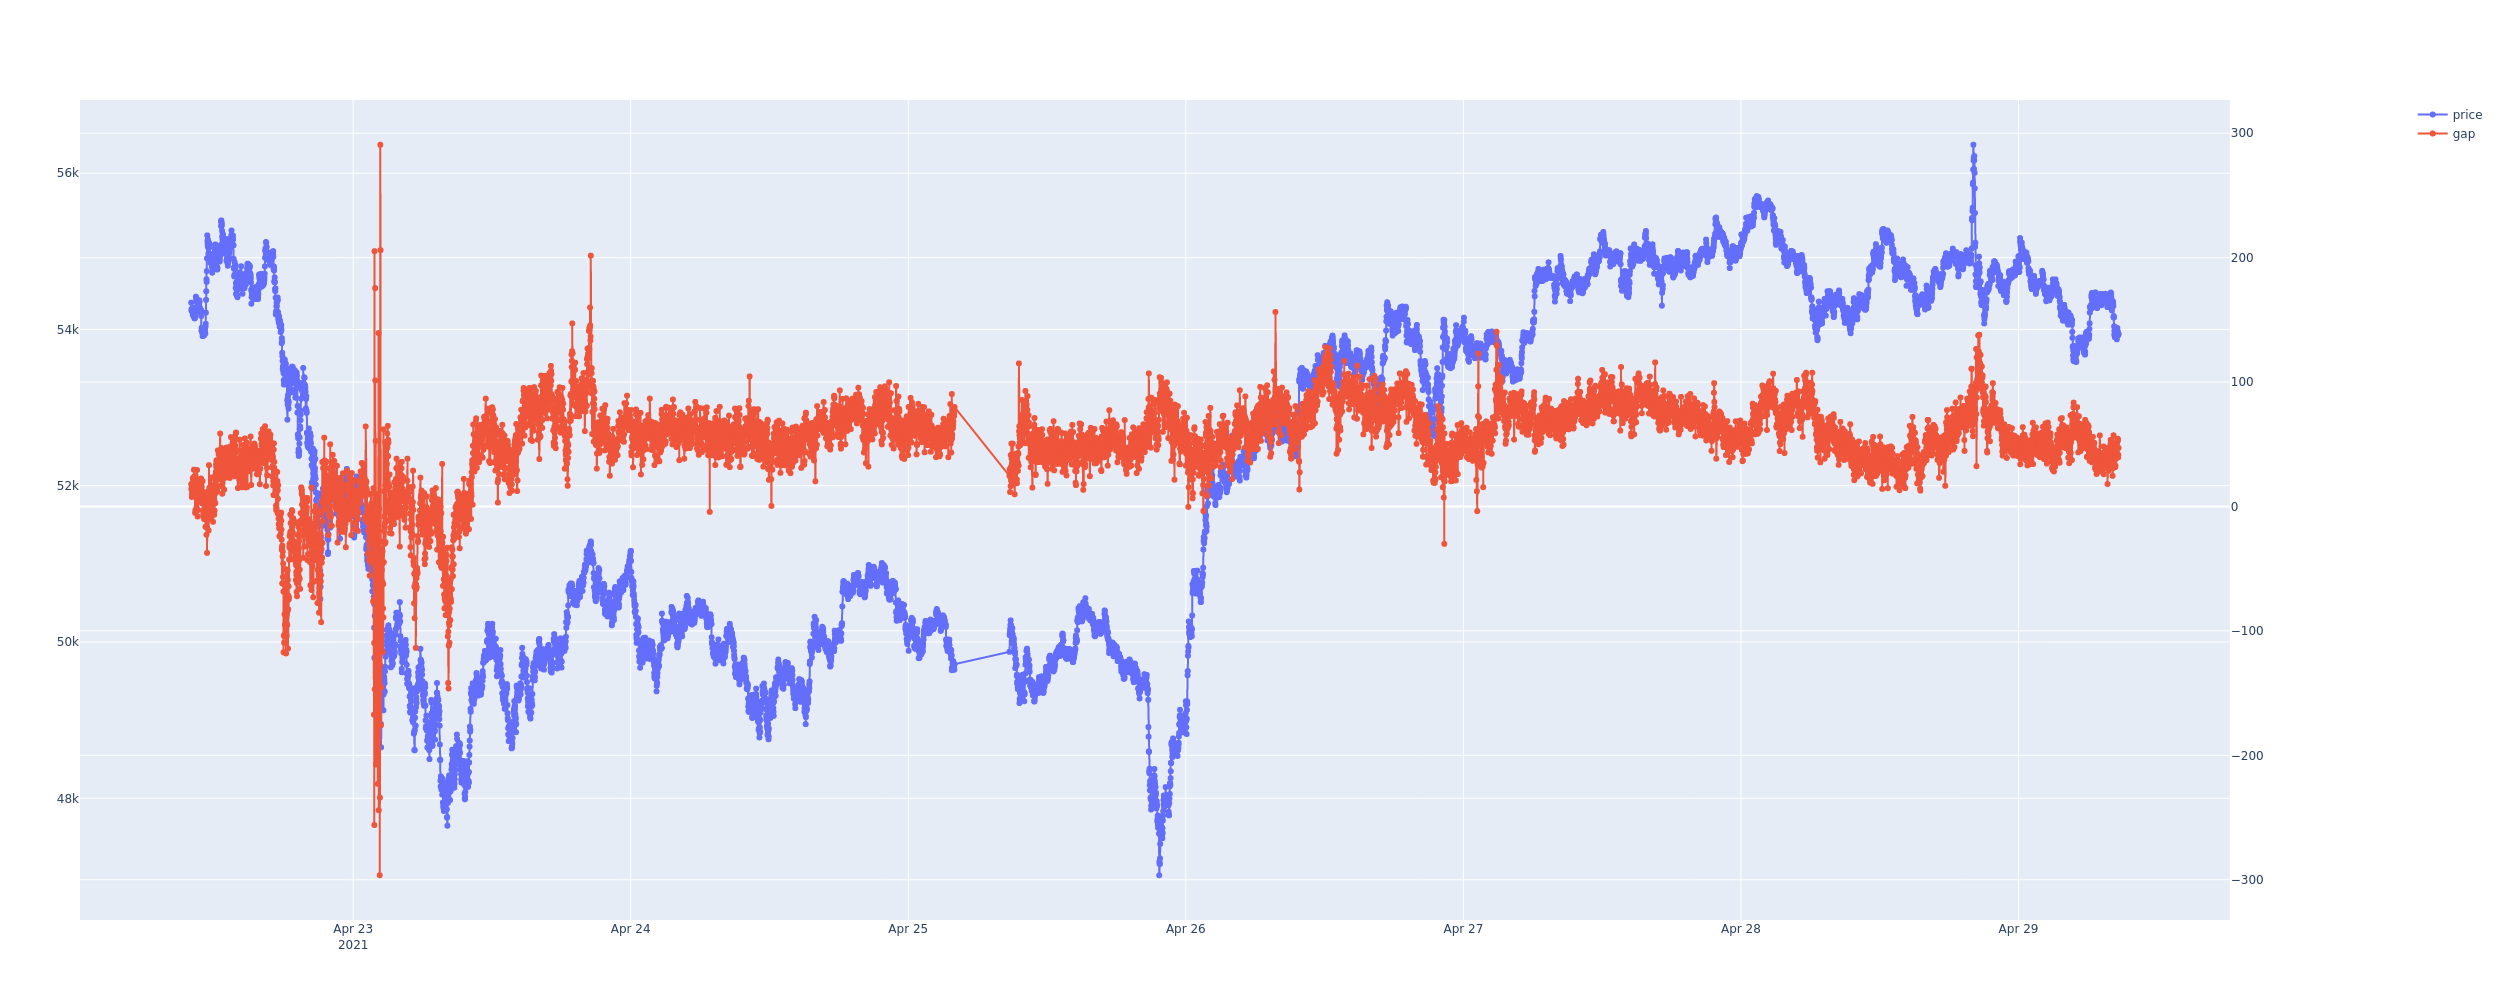

In [7]:
Image(filename='images/fig.png')

In [9]:
multiline_graph_img(x=data_grouped.index, y1=data_grouped.price_usd_close, y2=data_grouped.coinbase_premium_gap, title=['price', 'gap'])

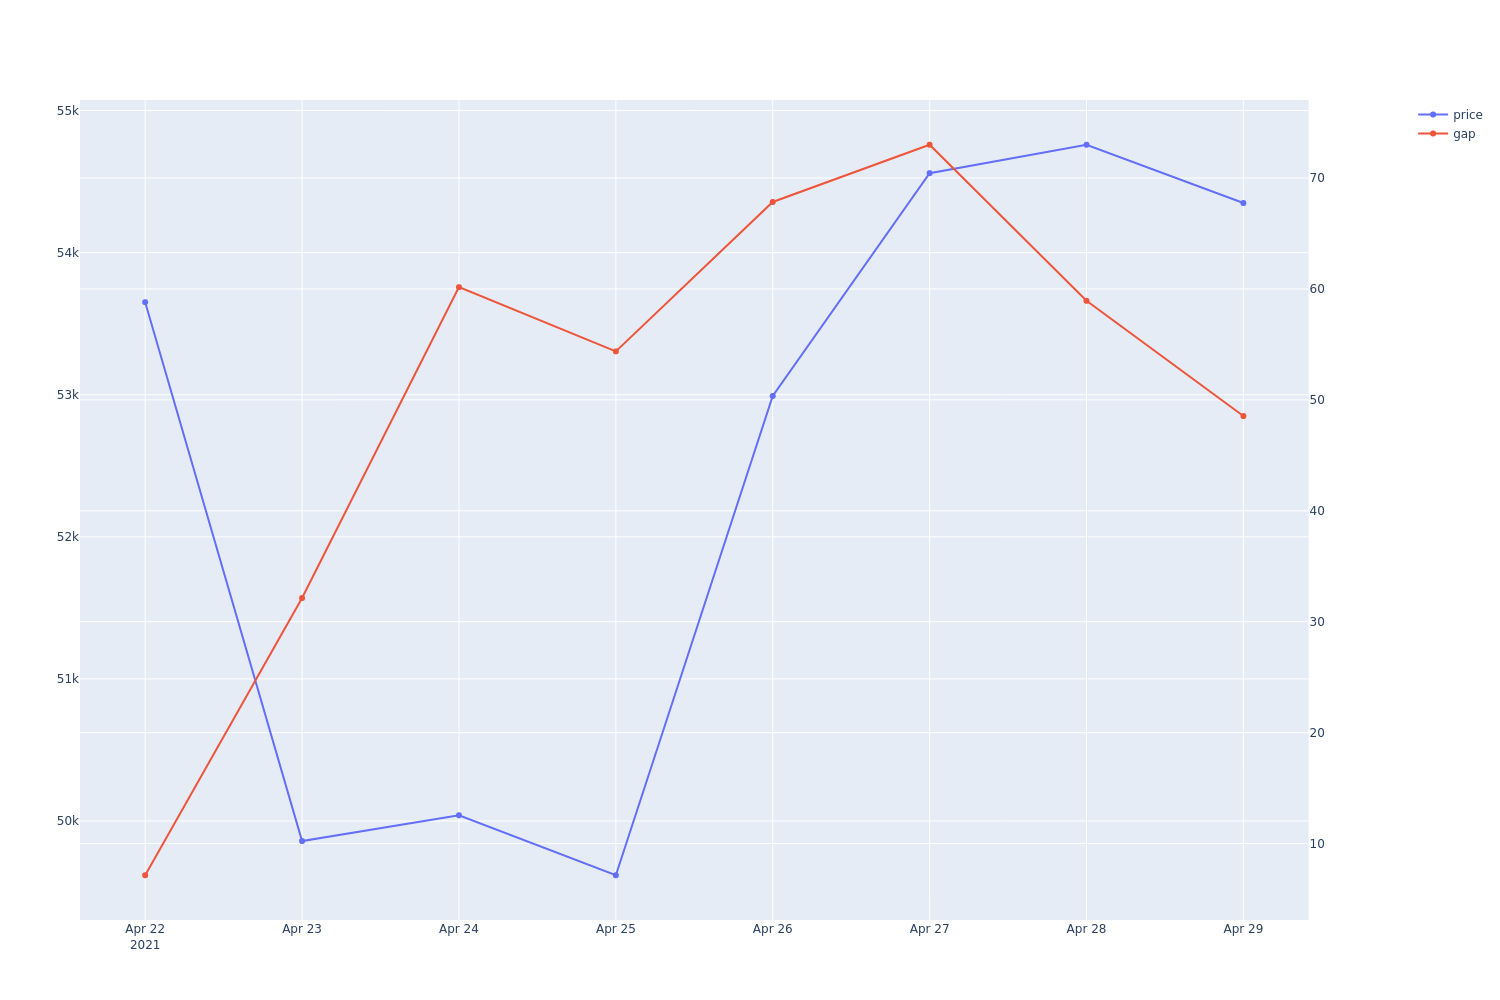

In [10]:
Image(filename='images/fig.png')

In [5]:
# data.to_excel('../data/test.xlsx', sheet_name='Sheet1')

In [6]:
one_month = 60 *  24 
# print(one_month)


# print('limit:', limit)
# # print('limit:', limit)

rounds = limit/one_month

# print('rounds:', rounds)

for day in range(int(rounds)):
    # print(day)
    mean1 = data[one_month*day: one_month* (day+1)].mean()
    print(f'Mean - day  {day} : {mean1.coinbase_premium_gap: 2f}') 
    # print(data[one_month*day: one_month* (day+1)].mea)

# data1 = data[0:one_month] 

# for 

# data2 = data[one_month*n:one_month*(n+1)] 


# mean1 = data.mean()
# mean1.price_usd_close

Mean - day  0 :  0.878479
Mean - day  1 :  43.568993
Mean - day  2 :  42.245743
Mean - day  3 :  34.228236
Mean - day  4 : -9.233313
Mean - day  5 :  32.798986
Mean - day  6 :  35.015750
Mean - day  7 :  4.912611
Mean - day  8 :  11.662076
Mean - day  9 :  39.923993
Mean - day  10 :  77.573514
Mean - day  11 :  38.946687
Mean - day  12 :  33.771840
Mean - day  13 :  16.256292
Mean - day  14 :  2.981375
Mean - day  15 :  4.366882
Mean - day  16 :  13.467125
Mean - day  17 :  29.256375
Mean - day  18 :  27.673750
Mean - day  19 :  25.177181
Mean - day  20 :  3.008611
Mean - day  21 :  2.090729
Mean - day  22 : -16.739417
Mean - day  23 : -1.101139
Mean - day  24 :  13.513826
Mean - day  25 : -5.610993
Mean - day  26 :  24.848486
Mean - day  27 :  2.721014
Mean - day  28 :  2.950243
Mean - day  29 :  13.757111
Mean - day  30 :  38.944312
Mean - day  31 :  8.437326
Mean - day  32 :  12.795042
Mean - day  33 : -8.591792
Mean - day  34 : -3.892243
Mean - day  35 :  37.068826
Mean - day  36 :

In [7]:
df_outliers_removed = outliers_removed(data)
print(df_outliers_removed.mean())
print(data.mean())


one_month = 60 *  24 
# print(one_month)


# print('limit:', limit)
# # print('limit:', limit)

rounds = limit/one_month

# print('rounds:', rounds)

for day in range(int(rounds)):
    # print(day)
    mean1 = df_outliers_removed[one_month*day: one_month* (day+1)].mean()
    print(f'Mean - day  {day} : {mean1.coinbase_premium_gap: 2f}') 
    # print(data[one_month*day: one_month* (day+1)].mea)

# data1 = data[0:one_month] 

# for 

# data2 = data[one_month*n:one_month*(n+1)] 


# mean1 = data.mean()
# mean1.price_usd_close


price_usd_open            55166.257866
price_usd_high            55199.489452
price_usd_low             55132.807118
price_usd_close           55166.343834
coinbase_premium_gap         21.581722
coinbase_premium_index        0.040069
dtype: float64
price_usd_open            55169.696631
price_usd_high            55203.385597
price_usd_low             55135.826715
price_usd_close           55169.830006
coinbase_premium_gap         22.429948
coinbase_premium_index        0.041601
dtype: float64
Mean - day  0 :  0.998306
Mean - day  1 :  43.577396
Mean - day  2 :  42.259375
Mean - day  3 :  34.776507
Mean - day  4 : -7.289104
Mean - day  5 :  33.414194
Mean - day  6 :  31.457222
Mean - day  7 :  6.935021
Mean - day  8 :  13.646917
Mean - day  9 :  43.690431
Mean - day  10 :  74.370299
Mean - day  11 :  37.538819
Mean - day  12 :  31.829382
Mean - day  13 :  14.464438
Mean - day  14 :  5.316660
Mean - day  15 :  5.350292
Mean - day  16 :  12.424910
Mean - day  17 :  30.233160
Mean - day  1

In [8]:
data_feed = PriceSignalData(dataname=data, timeframe=bt.TimeFrame.Minutes, compression=1, name='Binance')

In [9]:

BINANCE_Commission = 0.04 # percent (based on VIP 0, mmax(maker, taker)) = 0.04 * 0.01 * price 

fund = 100000
cerebro = bt.Cerebro()
cerebro.broker.setcash(fund)

# we don't actually receive cash when we buy perpetual short contracts on Binance
cerebro.broker.set_shortcash(False)

# cerebro.broker.setcommission(commission=0.1, margin=1, mult=10.0, name='Binance')
cerebro.broker.setcommission(
    commission=0.1, 
    commtype = bt.CommInfoBase.COMM_FIXED,
    automargin = 0.05,
    # margin=0.05, 
    mult=1.0, 
    leverage= 20, 
    stocklike = False, 
    name='Binance')

# cerebro.broker.setcommission(commission=0.1, name='Binance')
# cerebro.broker.setcommission(commission=0.1, margin=0, mult=10, name='data')? 


cerebro.adddata(data_feed)
cerebro.addstrategy(Test)
#cerebro.addstrategy(PrintData)
# cerebro.addstrategy(MACrossOver)
# cerebro.addstrategy(SMACross)
# cerebro.addstrategy(RSI)

cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="ta")
cerebro.addanalyzer(bt.analyzers.SQN, _name="sqn")

start_value = cerebro.broker.getvalue()
strategies = cerebro.run()
firstStrat = strategies[0]
end_value = cerebro.broker.getvalue()

pnl = end_value - start_value
print(f'Starting Portfolio Value: {start_value:2f}')
print(f'Final Portfolio Value: {end_value:2f}')
print(f'PnL: {pnl:.2f}')

# print_trade_analysis(firstStrat.analyzers.ta.get_analysis())
# print_sqn(firstStrat.analyzers.sqn.get_analysis())

# cerebro.plot()

BUY ORDER:( 90.03)
BUY EXECUTED, Price: 53651.49, Size:     1.00 Cost:  2682.57, Comm:     0.10
p: 53651.49166667 s: 1
SELL ORDER:( -111.18)
SELL EXECUTED, Price: 52789.24, Size:    -1.00 Cost:  2682.57, Comm:     0.10
OPERATION PROFIT, GROSS -862.25, NET -862.45
BUY ORDER:( 124.94)
BUY EXECUTED, Price: 51806.60, Size:     1.00 Cost:  2590.33, Comm:     0.10
p: 51806.60333333 s: 1
SELL ORDER:( -85.14)
SELL EXECUTED, Price: 51249.34, Size:    -1.00 Cost:  2590.33, Comm:     0.10
OPERATION PROFIT, GROSS -557.27, NET -557.47
BUY ORDER:( 76.45)
BUY EXECUTED, Price: 48375.02, Size:     1.00 Cost:  2418.75, Comm:     0.10
p: 48375.02333333 s: 1
SELL ORDER:( -119.77)
SELL EXECUTED, Price: 45371.34, Size:    -1.00 Cost:  2418.75, Comm:     0.10
OPERATION PROFIT, GROSS -3003.68, NET -3003.88
BUY ORDER:( 106.1)
BUY EXECUTED, Price: 49073.43, Size:     1.00 Cost:  2453.67, Comm:     0.10
p: 49073.43333333 s: 1
SELL ORDER:( -102.64)
SELL EXECUTED, Price: 46168.89, Size:    -1.00 Cost:  2453.67, Co

In [11]:
print(data.min())
print(data.max())

price_usd_open            47015.780000
price_usd_high            47247.996667
price_usd_low             46986.580000
price_usd_close           47015.563333
coinbase_premium_gap       -296.370000
coinbase_premium_index       -0.588743
dtype: float64
price_usd_open            56365.421667
price_usd_high            56448.285000
price_usd_low             56161.300000
price_usd_close           56364.145000
coinbase_premium_gap        290.770000
coinbase_premium_index        0.589617
dtype: float64


In [ ]:
premium = btalib.sma(coinbase)
premium.df

In [ ]:
coinbase['coinbase_premium_gap'].min()

In [ ]:
coinbase['coinbase_premium_gap'].max()

In [ ]:
coinbase['coinbase_premium_gap'].mean()

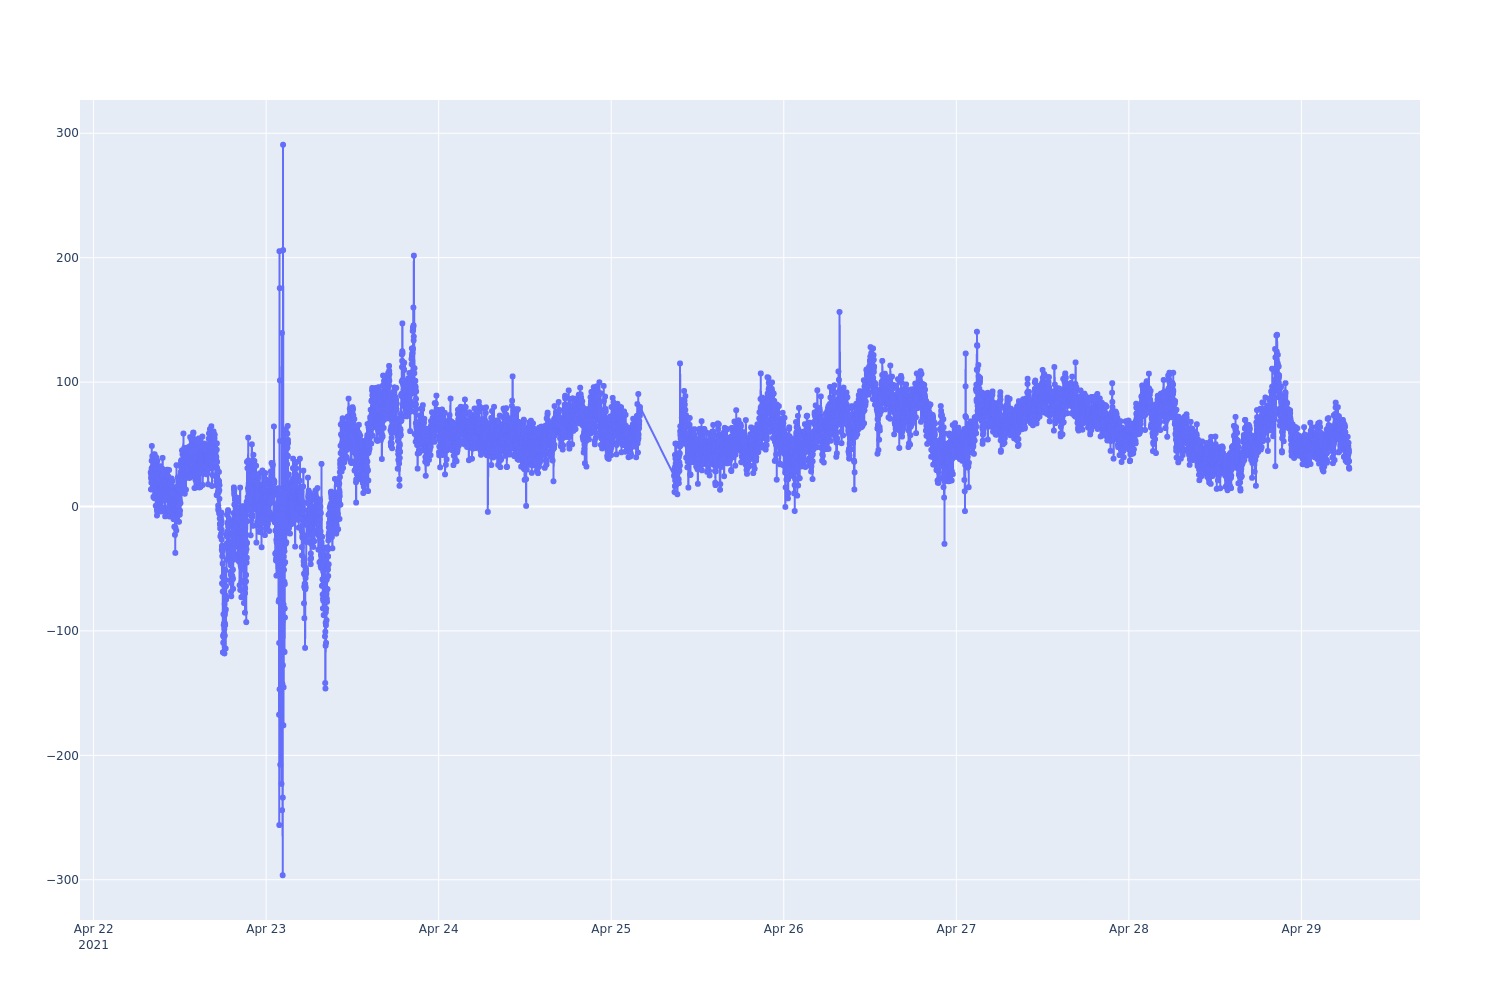

In [10]:
line_graph_img(x=coinbase.index, y=coinbase.coinbase_premium_gap, title='gap')


Image(filename='images/fig.png')

In [ ]:
multiline_graph(x=coinbase.index, y1=coinbase.coinbase_premium_gap, y2=price.price_usd_close, title=['gap', 'price'])
line_graph(x=coinbase.index, y=coinbase.coinbase_premium_gap, title='gap')


In [ ]:
coinbase['coinbase_premium_gap'].mean()